In [1]:
import os
os.chdir("../")
import torch
import warnings
warnings.filterwarnings('ignore')

import GCAST
os.environ["R_HOME"] = r"/public/home/ljquan/anaconda3/envs/myx/lib/R"
random_seed = 2025
device = "cuda:0" if torch.cuda.is_available() else "cpu"
packnames = ('mclust',)


In [2]:

data_root = "./Dataset/DLPFC"
sample_name = "151674"
print("start sampleid:" + sample_name)


start sampleid:151674


## Preprocess the spatial transcriptome to obtain adata

In [3]:
GCAST.set_seed(random_seed)
n_clusters = 7
adata, graph_dict = GCAST.Load10xST(data_root, sample_name, n_clusters, negi=12).data()
net = GCAST.GCAST(adata.obsm["X_pca"], graph_dict, device=device, model_path =f"{data_root}/{sample_name}",  model_name=f"{sample_name}")
net.train_with_dec()

 26%|██▌       | 261/1000 [00:42<01:58,  6.21it/s]


## Load the Previously Trained Model to Obtain Spot/Cell Representations for Clustering

> **Note**
>
> 1. After loading the `adata` object and the corresponding graph using `Load10xST()`, you can skip the `net.train_with_dec()` step.
> 2. The related datasets and weighted model `151674.pth` are available at the following link:  
>    https://pan.quark.cn/s/fa511e11c294
> 3. After downloading the pretrained weight file from the link, placing it at "../Dataset/DLPFC/151674/151674.pth" , you can use *net.eval()* to load the model and obtain the results in paper.  

In [4]:
# Using net.eval() will automatically load the pretrained weight file located at "../Dataset/DLPFC/151674/151674.pth".
adata.obsm["emb"] = net.eval()
GCAST.mclust_R(adata, n_clusters=n_clusters, use_rep="emb", random_seed=random_seed)
GCAST.evaluate_cluster(adata)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%
mclust ARI:0.6370 NMI:0.7317 AMI:0.7310 purity:0.8151, homogeneity:0.7211, completeness:0.7427, v_measure:0.7317


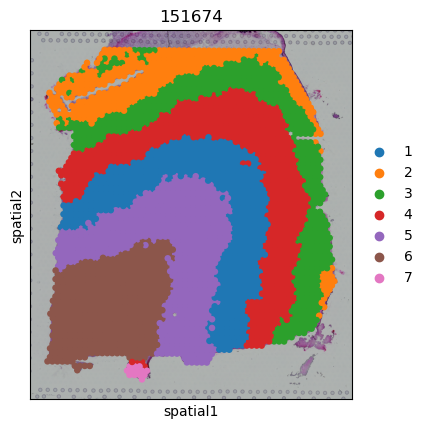

In [5]:
GCAST.plot_spatial(adata, color="mclust", title=f"{sample_name}",  save=False, show=True)